In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [126]:
elon = pd.read_csv('Elon_musk.csv',encoding='latin',index_col=0)

In [127]:
elon

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [128]:
import regex as re

# Cleaning

In [129]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
    return input_text

In [130]:
clean_txt = [remove_pattern(row,"@[\w]*") for row in elon['Text']]

In [131]:
elon['Text'].apply(lambda row:remove_pattern(row,"@[\w]*"))

1                                            Im an alien
2        Ray tracing on Cyberpunk with HDR is next-lev...
3                                        Great interview!
4                                  Doge is underestimated
5        Congratulations Tesla China for amazing execu...
                              ...                        
1995     True, it sounds so surreal, but the negative ...
1996     Make sure to read ur terms &amp; conditions b...
1997                                       Samwise Gamgee
1998     Altho Dumb and Dumber is <U+0001F525><U+0001F...
1999                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [132]:
elon['clean_text'] = elon['Text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


In [133]:

elon.head()

,Text,clean_text
1,@kunalb11 Im an alien,Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
3,@joerogan @Spotify Great interview!,Great interview!
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [134]:
elon['clean_text'] = elon['clean_text'].apply(lambda row:remove_pattern(row, "httpps[\w]*"))
elon

,Text,clean_text
1,@kunalb11 Im an alien,Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
3,@joerogan @Spotify Great interview!,Great interview!
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [135]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [136]:
elon['clean_text'] = [x.lower() for x in elon['clean_text']]
elon

,Text,clean_text
1,@kunalb11 Im an alien,im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
3,@joerogan @Spotify Great interview!,great interview!
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is <u+0001f525><u+0001f...


In [137]:
elon['clean_text'] = elon['clean_text'].apply(lambda row:remove_pattern(row, "https?://\S+|www\.\S+"))
elon

,Text,clean_text
1,@kunalb11 Im an alien,im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
3,@joerogan @Spotify Great interview!,great interview!
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is <u+0001f525><u+0001f...


In [138]:
elon['clean_text'] = elon['clean_text'].apply(lambda row:remove_pattern(row, ""))
elon

,Text,clean_text
1,@kunalb11 Im an alien,im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
3,@joerogan @Spotify Great interview!,great interview!
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is <u+0001f525><u+0001f...


In [139]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
elon['clean_text']=elon['clean_text'].apply(lambda x: remove_emoji(x))
elon.tail(10)


,Text,clean_text
1990,"@buzzindelhi Sorry, should hopefully be soon!","sorry, should hopefully be soon!"
1991,"@kenyanwalstreet Not actually a payout, just a...","not actually a payout, just a vesting of stoc..."
1992,@IheartTesla No easy way to answer this in a t...,"no easy way to answer this in a tweet, but he..."
1993,AI symbiosis while u wait,ai symbiosis while u wait
1994,@vistacruiser7 @flcnhvy Theres some of that too,theres some of that too
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is <u+0001f525><u+0001f...
1999,Progress update August 28,progress update august 28


In [140]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
elon['clean_text']=elon['clean_text'].apply(lambda x: clean(x))
elon.tail(10)


,Text,clean_text
1990,"@buzzindelhi Sorry, should hopefully be soon!","sorry, should hopefully be soon!"
1991,"@kenyanwalstreet Not actually a payout, just a...","not actually a payout, just a vesting of stoc..."
1992,@IheartTesla No easy way to answer this in a t...,"no easy way to answer this in a tweet, but he..."
1993,AI symbiosis while u wait,ai symbiosis while u wait
1994,@vistacruiser7 @flcnhvy Theres some of that too,theres some of that too
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is
1999,Progress update August 28,progress update august


In [141]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     PAVILION\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
elon

,Text,clean_text
1,@kunalb11 Im an alien,im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...
3,@joerogan @Spotify Great interview!,great interview!
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is


In [143]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in elon.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.clean_text.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
elon['absolute_clean'] = cleaned_tweets
elon.head(10)


,Text,clean_text,absolute_clean
1,@kunalb11 Im an alien,im an alien,im alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...,ray tracing cyberpunk hdr next-level. tried it?
3,@joerogan @Spotify Great interview!,great interview!,great interview!
4,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!,happy new year ox!
7,"Frodo was the underdoge,\nAll thought he would...","frodo was the underdoge,all thought he would f...","frodo underdoge,all thought would fail,himself..."
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks :),thanks :)
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,indeed! tweets definitely do not represent r...,indeed! tweets definitely represent real-world...
10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,entertaining outcome likely


# Tokenization

In [144]:
elon['Tokenized_text'] = [word_tokenize(x) for x in elon['absolute_clean']]
elon

,Text,clean_text,absolute_clean,Tokenized_text
1,@kunalb11 Im an alien,im an alien,im alien,"[im, alien]"
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...,ray tracing cyberpunk hdr next-level. tried it?,"[ray, tracing, cyberpunk, hdr, next-level, ., ..."
3,@joerogan @Spotify Great interview!,great interview!,great interview!,"[great, interview, !]"
4,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,"[doge, underestimated]"
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...,"[congratulations, tesla, china, amazing, execu..."
...,...,...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","true, it sounds so surreal, but the negative ...","true, sounds surreal, negative propaganda stil...","[true, ,, sounds, surreal, ,, negative, propag..."
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms &amp; conditions b...,make sure read ur terms &amp; conditions click...,"[make, sure, read, ur, terms, &, amp, ;, condi..."
1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee,"[samwise, gamgee]"
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is,altho dumb dumber,"[altho, dumb, dumber]"


In [145]:
# Lemmatization
from nltk import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()


In [146]:
tokenized_tweet = elon['absolute_clean']
tokenized_tweet.head(10)

1                                              im alien
2       ray tracing cyberpunk hdr next-level. tried it?
3                                      great interview!
4                                   doge underestimated
5     congratulations tesla china amazing execution ...
6                                    happy new year ox!
7     frodo underdoge,all thought would fail,himself...
8                                             thanks :)
9     indeed! tweets definitely represent real-world...
10                          entertaining outcome likely
Name: absolute_clean, dtype: object

In [147]:
' '.join(x for x in  tokenized_tweet)

'im alien ray tracing cyberpunk hdr next-level. tried it? great interview! doge underestimated congratulations tesla china amazing execution last year. next even more!! happy new year ox! frodo underdoge,all thought would fail,himself all. thanks :) indeed! tweets definitely represent real-world time allocation. entertaining outcome likely sent agree clubhouse  getting real bought dogecoin lil x, toddler hodler definitely issues, sentencing seems bit high thanks fixing please unlock account  true power crypto wallet wont give private keys avoided costs app sucks : nasa selected falcon heavy launch first two elements lunar gateway together one mission! yes predict cash flow reasonably well, starlink ipo starlink staggeringly difficult technical &amp; economic endeavor. however, spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered, net value product made. must scalable g meant price countries. difference taxes &amp; shipping. intended earth, ma

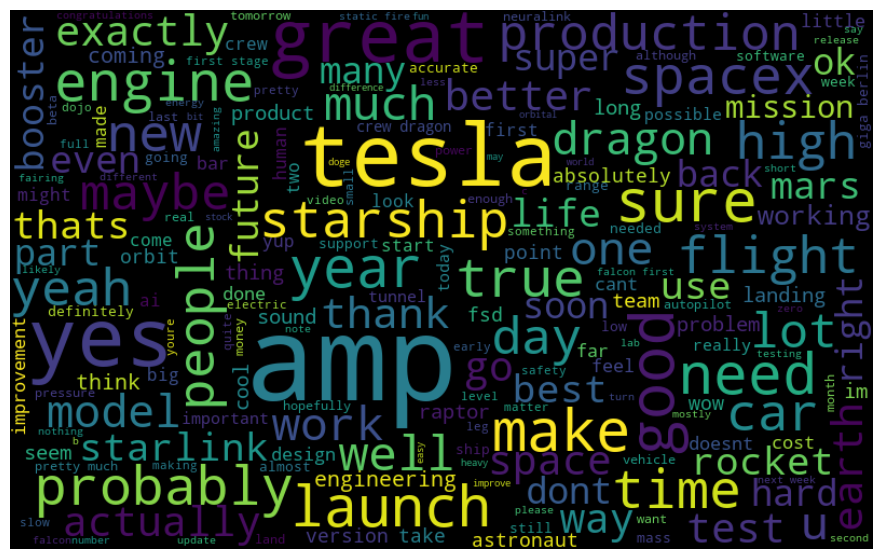

In [148]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(x for x in  tokenized_tweet) )

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [149]:
# Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

In [150]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'


In [151]:
sentiments_using_SIA = elon.absolute_clean.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,absolute_clean
pos,1800
neg,199


In [152]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(elon.absolute_clean[3])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [153]:
df=pd.DataFrame()
df['Tweets'] = elon.absolute_clean
df['scores'] = elon['Text'].apply(lambda review:sid.polarity_scores(review))
df.head()

,Tweets,scores
1,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,ray tracing cyberpunk hdr next-level. tried it?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp..."
4,doge underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
5,congratulations tesla china amazing execution ...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp..."


In [154]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Tweets,scores,compound
1,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,ray tracing cyberpunk hdr next-level. tried it?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588
4,doge underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732
5,congratulations tesla china amazing execution ...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513


In [155]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Tweets,scores,compound,sentiment
1,im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,ray tracing cyberpunk hdr next-level. tried it?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588,Positive
4,doge underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,Negative
5,congratulations tesla china amazing execution ...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513,Positive
...,...,...,...,...
1995,"true, sounds surreal, negative propaganda stil...","{'neg': 0.234, 'neu': 0.588, 'pos': 0.178, 'co...",-0.4215,Negative
1996,make sure read ur terms &amp; conditions click...,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.6360,Positive
1997,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1998,altho dumb dumber,"{'neg': 0.537, 'neu': 0.463, 'pos': 0.0, 'comp...",-0.7003,Negative


In [156]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient()

,sentiment,Tweets
1,Neutral,901
2,Positive,873
0,Negative,225


<Axes: xlabel='sentiment', ylabel='count'>

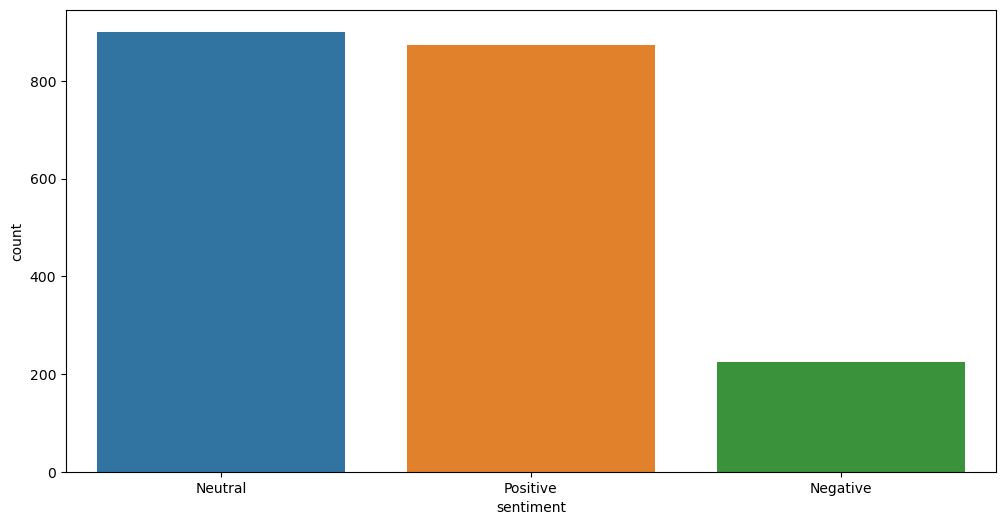

In [157]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='compound', ylabel='Density'>

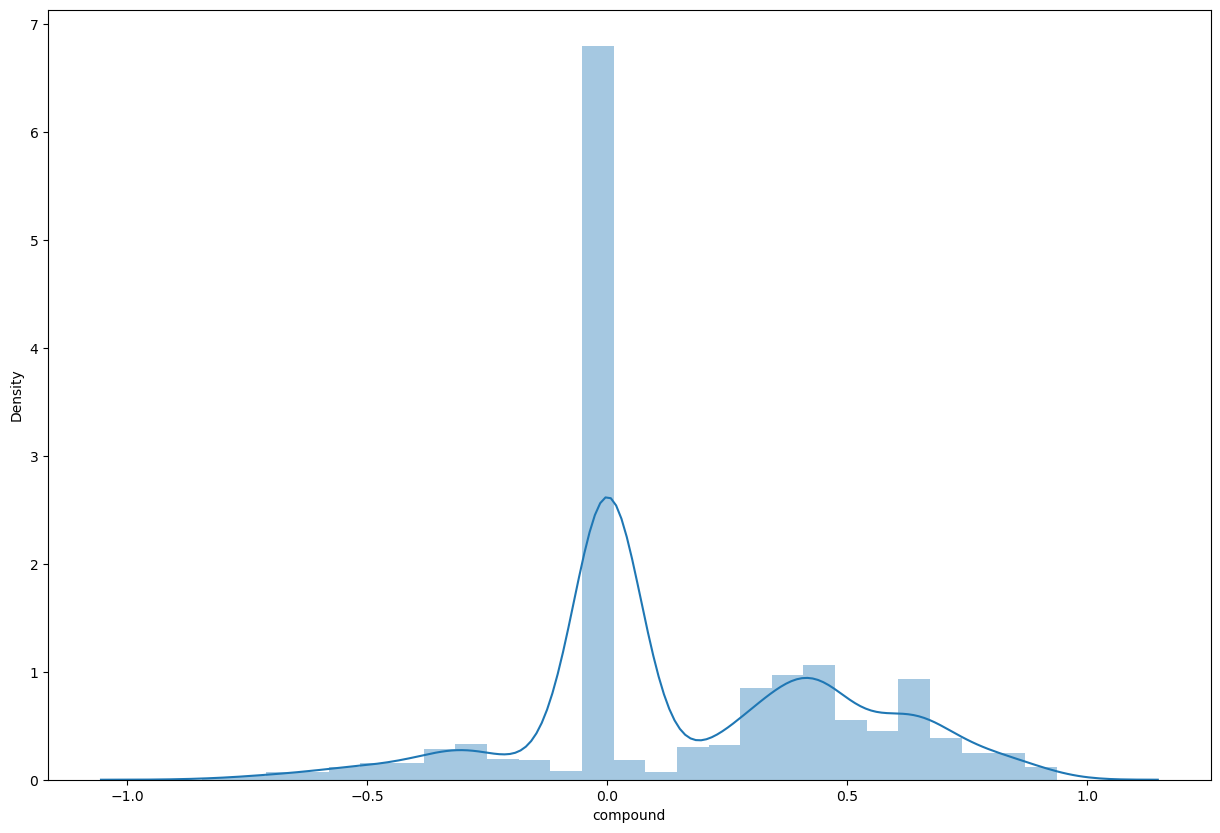

In [158]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

<Axes: ylabel='compound'>

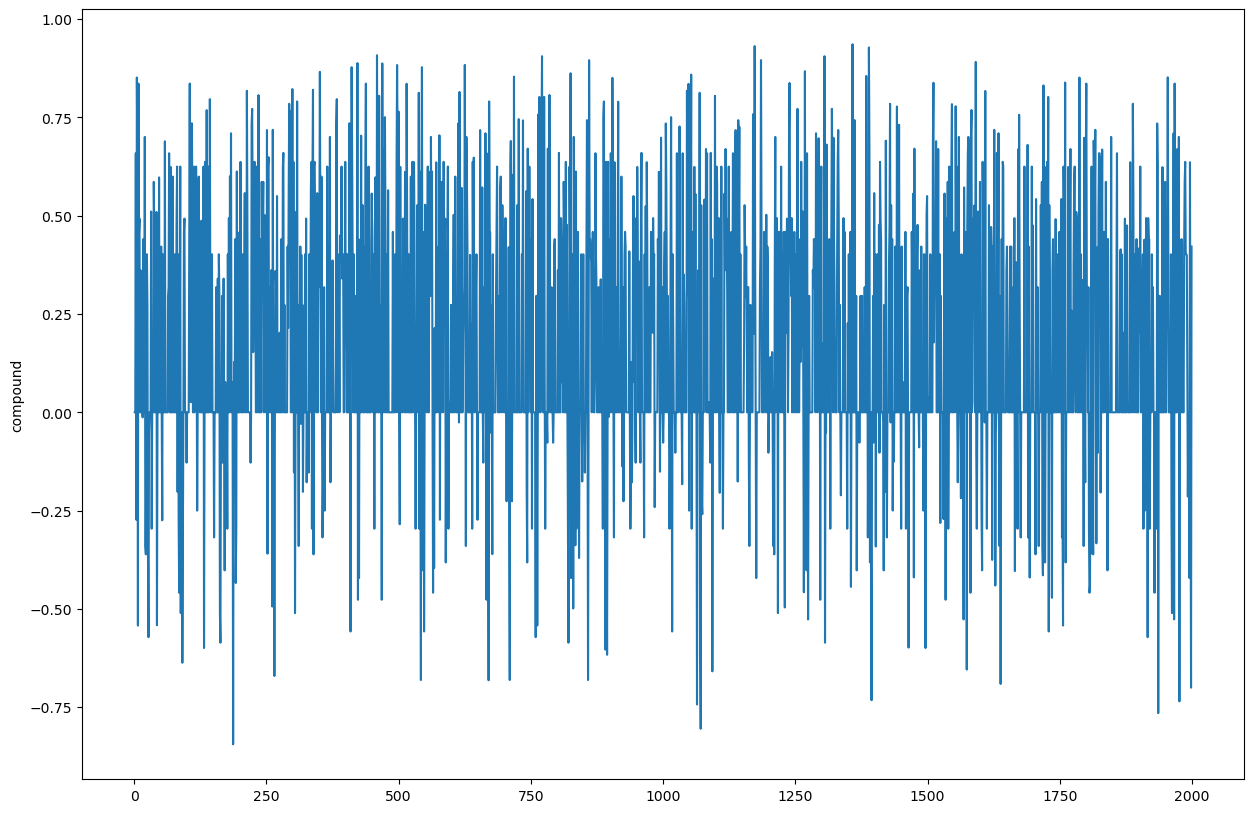

In [159]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='compound',x=df.index,data=df)

In [160]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
  

In [161]:
elon['sentiment'] = sentiments_using_SIA
elon.head()

,Text,clean_text,absolute_clean,Tokenized_text,sentiment
1,@kunalb11 Im an alien,im an alien,im alien,"[im, alien]",pos
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next-lev...,ray tracing cyberpunk hdr next-level. tried it?,"[ray, tracing, cyberpunk, hdr, next-level, ., ...",pos
3,@joerogan @Spotify Great interview!,great interview!,great interview!,"[great, interview, !]",pos
4,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,"[doge, underestimated]",neg
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...,congratulations tesla china amazing execution ...,"[congratulations, tesla, china, amazing, execu...",pos


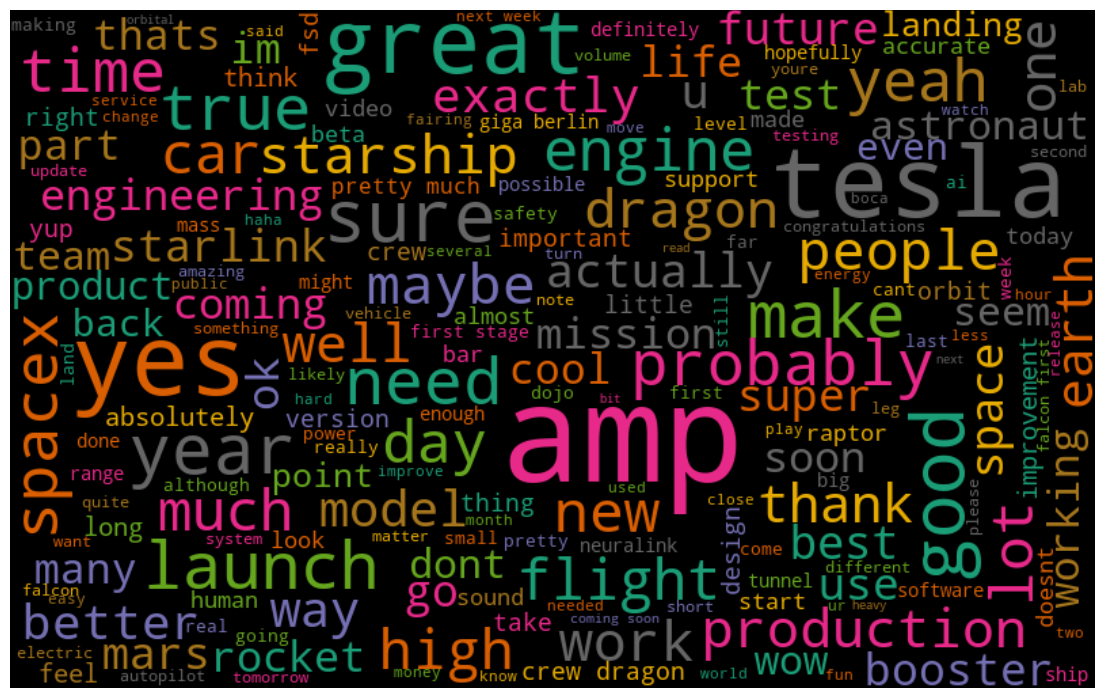

In [162]:
# All positive words wordcloud
all_words = ' '.join([text for text in elon['absolute_clean'][elon.sentiment == 'pos']])
generate_wordcloud(all_words)



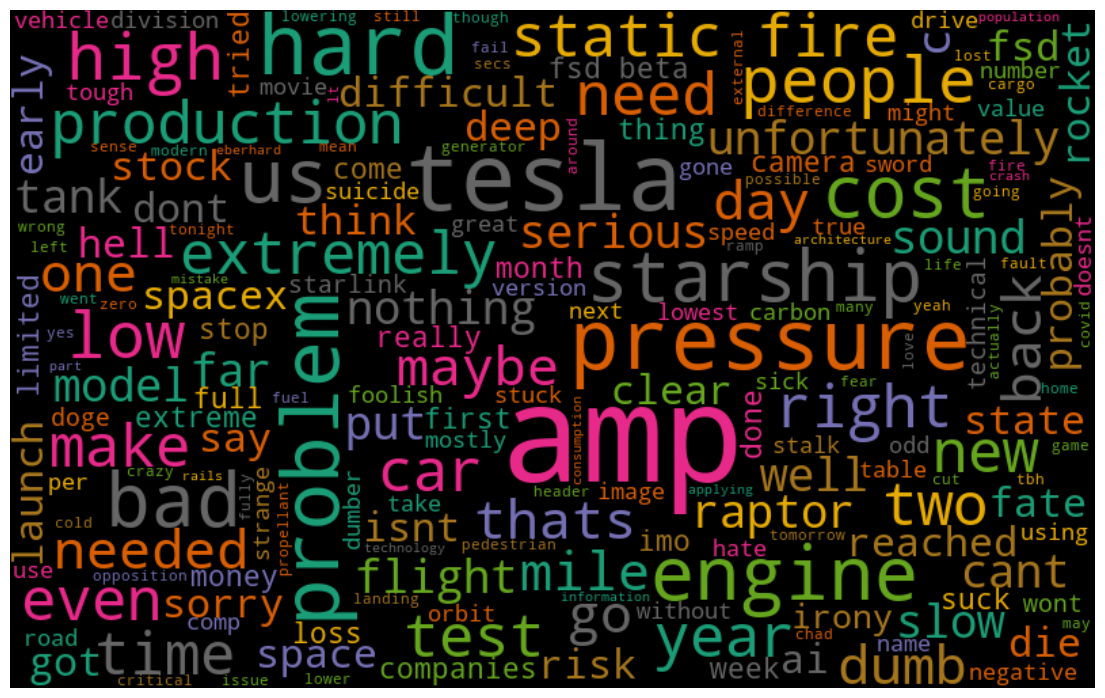

In [163]:
# All negative words wordcloud
all_words = ' '.join([text for text in elon['absolute_clean'][elon.sentiment == 'neg']])
generate_wordcloud(all_words)

